In [1]:
import numpy as np
import tensorflow as tf

# %matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors 

import ipysh
import Hunch_utils  as Htls
import Hunch_lsplot as Hplt
import Hunch_tSNEplot as Hsne

%aimport Hunch_tSNEplot

reload set for module  Hunch_utils
reload set for module  Hunch_lsplot
reload set for module  models.AEFIT
reload set for module  models.AEFIT_v1
reload set for module  models.AEFIT0
reload set for module  models.AEFIT1
reload set for module  models.SPFIT
reload set for module  Dummy_g1data


In [2]:
qsh = Htls.QSH_Dataset()
import os
file = ipysh.abs_builddir+'/te_db_r15.npy'
if os.path.isfile(file):
    qsh.load(file)
else:
    qsh.load(ipysh.abs_builddir+'/te_db_1.npy')    
    qsh.rebalance_prel(15)
    qsh.save(ipysh.abs_builddir+'/te_db_r15.npy')

In [3]:
qsh.shuffle()
# qsh.filter_number_set(15)
qsh.clean_up_poorcurves(5)
qsh.dim = 15
qsh.set_null(np.nan)
qsh.set_normal_positive()
qsh.unbias_mean(0.5, 'te')
qsh.set_normal_positive()

print("QSH rebalanced 15 points size: ", len(qsh))

QSH rebalanced 15 points size:  61519


In [4]:
qsh.set_null(np.nan)
qsh.clip_values(0.1,0.4)
qsh.set_normal_positive()

## t-SNE Plot

In [96]:
qsh.set_null(-1)
sne = Htls.tSNE()
# sne.perplexity = 50.
sne.random = 42

ds = qsh[range(0,4000)]
ds = np.concatenate([ds['prel'],ds['te']], axis=1)
# ds = np.array(list(zip(ds['prel'],ds['te'])))
sne(ds)

array([[-27.093836 , -55.220608 ],
       [-22.61425  ,  21.610554 ],
       [-10.182891 , -44.64855  ],
       ...,
       [ 36.236996 ,  -2.0206392],
       [-53.939518 ,  31.979866 ],
       [-59.37836  , -17.28724  ]], dtype=float32)

In [97]:
from bokeh.io import show, output_notebook
output_notebook()

p = Hsne.tSNE_PlotBokeh()
p.set_model(sne)
p.set_data(qsh, 1000)
p.plot(notebook_url='http://172.17.0.2:8888')

Loading BokehJS ...

## VAE reconstruction - beta

In [5]:
import models.AEFIT2 as aefit
q_vae = aefit.AEFIT(latent_dim=2, feature_dim=30, dprate=0.4, scale=5, beta=100.)
qsh.set_null(np.nan)

aefit 0 configured new


0-20 loss: 1590.805420
0-40 loss: 1579.890625
0-60 loss: 1586.418213
0-80 loss: 1584.077881
0-100 loss: 1571.587402
0-120 loss: 1582.947021
0-140 loss: 1575.854004
0-160 loss: 1586.674194
0-180 loss: 1582.732422
0-200 loss: 1571.715210
1-220 loss: 1568.547974
1-240 loss: 1577.503540
1-260 loss: 1584.512573
1-280 loss: 1581.938599
1-300 loss: 1572.521118
1-320 loss: 1569.943115
1-340 loss: 1565.372559
1-360 loss: 1586.313232
1-380 loss: 1580.829468
1-400 loss: 1593.581055
2-420 loss: 1579.746826
2-440 loss: 1569.979004
2-460 loss: 1581.502686
2-480 loss: 1566.809326
2-500 loss: 1582.692139
2-520 loss: 1580.097412
2-540 loss: 1561.975342
2-560 loss: 1589.107910
2-580 loss: 1593.540039
2-600 loss: 1569.922119
3-620 loss: 1582.942383
3-640 loss: 1567.200073
3-660 loss: 1581.713623
3-680 loss: 1572.919312
3-700 loss: 1581.909302
3-720 loss: 1586.570557
3-740 loss: 1563.227417
3-760 loss: 1591.748047
3-780 loss: 1579.594971
3-800 loss: 1567.744507
3-820 loss: 1588.314453
4-840 loss: 1582.012

InvalidArgumentError: slice index 19 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

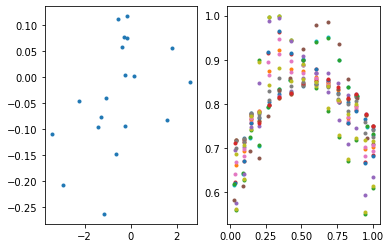

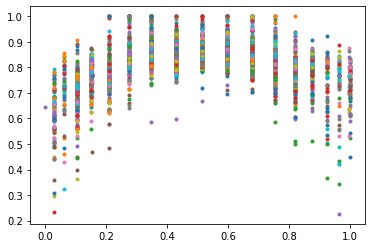

In [49]:
aefit.test_dummy(q_vae, qsh, batch=300, epoch=20)

In [ ]:
# q_vae.save('step6_beta_r15')

In [ ]:
# q_vae.load('step6_beta_r15')

In [50]:
from bokeh.io import show, output_notebook
output_notebook()

p = Hplt.LSPlotBokeh()
p.set_model(q_vae)
p.set_data(qsh, counts=8000)
p.plot(notebook_url='http://172.17.0.2:8888')

Loading BokehJS ...

In [66]:
# extract few points curve
import copy

qsh2 = Htls.QSH_Dataset()
qsh2.load(ipysh.abs_builddir+'/te_db_r15.npy')
qsh2.dim = 15
qsh2.set_null(np.nan)
qsh2.set_normal_positive()
qsh2.unbias_mean(0.5, 'te')
qsh2.set_normal_positive()
qsh2.set_null(np.nan)
qsh2.clip_values(0.1,0.4)
qsh2.set_normal_positive()


qsh2.filter_number_set(5)
qsh2.dim = 15




tf.Tensor(
[       nan        nan        nan        nan        nan 0.3485927
 0.42948723 0.51404023 0.59859335 0.6794879         nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.79487795 0.8055468  0.8072162  0.80778384
 0.8059376         nan        nan        nan        nan        nan], shape=(30,), dtype=float32)
[-0.07235261  0.05985692]


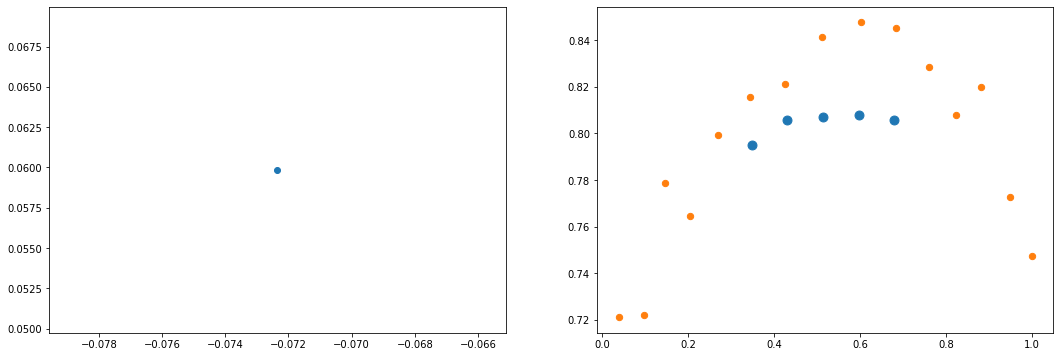

In [95]:

fig = plt.figure('gen_missing_curve',figsize=(18, 6))
plt.clf()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)    
# ax1.set_xlim(-2.,2.)
# ax1.set_ylim(-2.,2.)

qsh2.shuffle()
for xy in qsh2.ds_array.take(1):
    xy,_ = xy
    print(xy)
    x,y = tf.split(xy,2)
    ax2.scatter(x,y,s=80)
    m,v  = q_vae.encode([xy])    
    gpt = m[0].numpy()
    print(gpt)
    ax1.scatter(gpt[0],gpt[1])

    XY = q_vae.decode(m,apply_sigmoid=True)
    X,Y = tf.split(XY[0], 2)
    X,Y = (X.numpy(), Y.numpy())

    ax2.scatter(X,Y,s=40)

